In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# read and extract longitude, latitude, altitude, and e_density from ISS data
iss_df = pd.read_csv("../data/ISS_SP_FPMU_20200914_half.csv")
iss_df.head()

EPOCH_yyyy-mm-ddThh:mm:ss.sssZ  LATITUDE_deg  LONGITUDE_deg  ALTITUDE_km  \
0       2020-09-14T00:02:57.159Z         0.700         94.234      420.404   
1       2020-09-14T00:02:58.160Z         0.649         94.270      420.411   
2       2020-09-14T00:02:59.164Z         0.598         94.306      420.418   
3       2020-09-14T00:03:03.168Z         0.393         94.450      420.447   
4       2020-09-14T00:03:04.167Z         0.342         94.486      420.454   

   ION_DENSITY_m-3  ELECTRON_TEMPERATURE_K  ISS_PITCH_ANGLE_deg  SUNLIGHT_%  \
0     5.650000e+10                  2583.0                358.0       100.0   
1     6.250000e+10                  -999.0                358.0       100.0   
2    -1.000000e+31                  -999.0                358.0       100.0   
3    -1.000000e+31                  -999.0                358.0       100.0   
4    -1.000000e+31                  -999.0                358.0       100.0   

   TIME_CODE_CORRECTION_  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [3]:
iss_df.describe()

LATITUDE_deg  LONGITUDE_deg   ALTITUDE_km  ION_DENSITY_m-3  \
count  36730.000000   36730.000000  36730.000000     3.673000e+04   
mean       2.125595     193.690106    425.845740    -3.313368e+29   
std       35.096452     101.454492      5.926171     1.789880e+30   
min      -51.799000       0.033000    419.496000    -1.000000e+31   
25%      -31.713500     122.570750    421.029250     6.280000e+10   
50%        4.121500     196.893000    423.968000     9.900000e+10   
75%       35.707000     280.650250    429.848000     1.440000e+11   
max       51.799000     359.974000    438.207000     1.210000e+12   

       ELECTRON_TEMPERATURE_K  ISS_PITCH_ANGLE_deg    SUNLIGHT_%  \
count            36730.000000              36730.0  36730.000000   
mean              1613.854560                358.0     67.818267   
std               1323.057507                  0.0     46.612393   
min               -999.000000                358.0      0.000000   
25%               1446.000000                358.0      0.000000   
50%               1759.000000                358.0    100.000000   
75%               2558.000000                358.0    100.000000   
max               5338.000000                358.0    100.000000   

       TIME_CODE_CORRECTION_  
count           36730.000000  
mean                0.048326  
std                 0.232722  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 3.000000

In [4]:
iss_df_reduced = iss_df.iloc[::25,:]
iss_df_reduced.describe()

LATITUDE_deg  LONGITUDE_deg  ALTITUDE_km  ION_DENSITY_m-3  \
count   1470.000000    1470.000000  1470.000000     1.470000e+03   
mean       2.105269     193.631548   425.851324    -3.673469e+29   
std       35.121761     101.522877     5.933362     1.881737e+30   
min      -51.799000       0.040000   419.496000    -1.000000e+31   
25%      -31.580250     122.323500   421.022250     6.310000e+10   
50%        4.027500     196.797500   423.995000     9.875000e+10   
75%       35.592750     280.813750   429.796250     1.440000e+11   
max       51.799000     359.902000   438.207000     1.200000e+12   

       ELECTRON_TEMPERATURE_K  ISS_PITCH_ANGLE_deg   SUNLIGHT_%  \
count             1470.000000               1470.0  1470.000000   
mean              1601.178912                358.0    67.816952   
std               1331.079860                  0.0    46.598825   
min               -999.000000                358.0     0.000000   
25%               1440.250000                358.0     0.000000   
50%               1747.000000                358.0   100.000000   
75%               2537.750000                358.0   100.000000   
max               4364.000000                358.0   100.000000   

       TIME_CODE_CORRECTION_  
count            1470.000000  
mean                0.048299  
std                 0.241352  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 3.000000

In [5]:
latitude = iss_df_reduced.iloc[:,1].values   #float64
longitude = iss_df_reduced.iloc[:,2].values
altitude = iss_df_reduced.iloc[:,3].values
e_density = iss_df_reduced.iloc[:,4].values

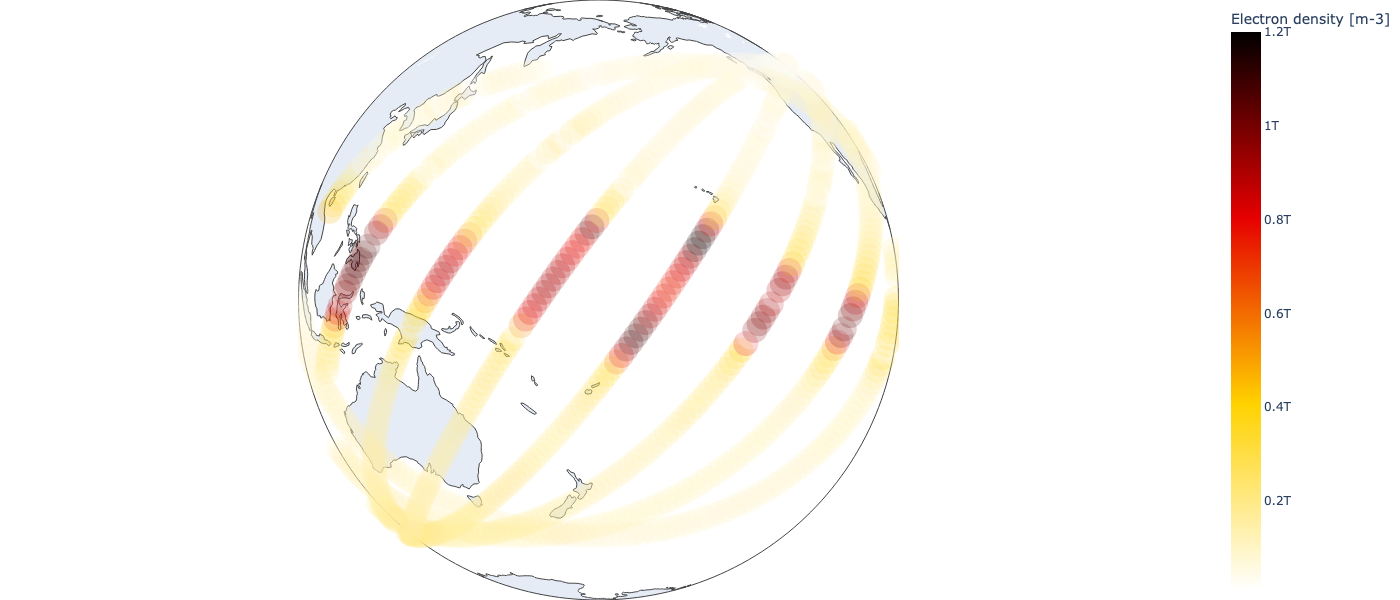

In [6]:
# making the plot
fig = go.Figure(go.Scattergeo(
        lon = longitude,
        lat = latitude,
        mode = 'markers',
        marker = dict(
            size = 25,
            opacity = 0.2,
            reversescale = True,
            autocolorscale = False,
            colorscale = 'hot',
            cmin = 1e+10,
            color = e_density,
            cmax = e_density.max(),
            colorbar_title="Electron density [m-3]"
        )
))
fig.update_geos(projection_type = "orthographic",
                projection_rotation = {'lat': 0, 'lon': 180, 'roll': 0})
fig.update_layout(width= 1000, height=600, margin={"r":0,"t":0,"l":0,"b":0})
# fig.write_html("ml_plot.html")
fig.show()


In [7]:

# # Define the dimensions of the grid
# nlon = 360 # number of grid cells in the longitude direction (0 to 360 degrees)
# nlat = 180 # number of grid cells in the latitude direction (-90 to 90 degrees)

# # Create the NetCDF file
# ncfile = Dataset('electron_density.grd', 'w', format='NETCDF4')

# # Define the dimensions of the grid in the NetCDF file
# ncfile.createDimension('longitude', nlon)
# ncfile.createDimension('latitude', nlat)

# # Define the variables to be stored in the file
# longitude = ncfile.createVariable('longitude', 'f4', ('longitude',))
# latitude = ncfile.createVariable('latitude', 'f4', ('latitude',))
# electron_density = ncfile.createVariable('electron_density', 'f4', ('latitude', 'longitude'))

# # Set the attributes of the variables and the file
# ncfile.description = 'Example grid-registered NetCDF file with electron density data'
# longitude.units = 'degrees_east'
# latitude.units = 'degrees_north'
# electron_density.units = 'electrons/m^3'

# # Populate the variables with data
# longitude[:] = np.linspace(0, 360, nlon, endpoint=False) # 0 to 360 degrees, not including 360
# latitude[:] = np.linspace(-90, 90, nlat)
# # electron density values can be replaced with actual data
# electron_density[:,:] = np.random.rand(nlat, nlon)

# # Close the NetCDF file
# ncfile.close()


In [181]:
two_d = pd.read_csv("../data/ISS_SP_FPMU_20200909_20200911_20200912_20200913_20200914_half.csv")

In [182]:
two_d.describe()

LATITUDE_deg  LONGITUDE_deg    ALTITUDE_km  ION_DENSITY_m-3  \
count  171341.000000  171341.000000  171341.000000     1.713410e+05   
mean        3.084086     197.363516     425.516798    -3.092663e+29   
std        34.766469     102.130281       5.914913     1.731195e+30   
min       -51.802000       0.021000     418.554000    -1.000000e+31   
25%       -29.471000     126.025000     420.813000     6.370000e+10   
50%         5.321000     200.642000     423.602000     9.210000e+10   
75%        36.326000     287.198000     428.960000     1.210000e+11   
max        51.802000     359.984000     438.674000     1.210000e+12   

       ELECTRON_TEMPERATURE_K  ISS_PITCH_ANGLE_deg     SUNLIGHT_%  \
count           171341.000000             171341.0  171341.000000   
mean              1688.211024                358.0      64.939434   
std               1329.381356                  0.0      47.628406   
min               -999.000000                358.0       0.000000   
25%               1452.000000                358.0       0.000000   
50%               1871.000000                358.0     100.000000   
75%               2622.000000                358.0     100.000000   
max               5338.000000                358.0     100.000000   

       TIME_CODE_CORRECTION_  
count          171341.000000  
mean                0.050683  
std                 0.240543  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 3.000000

In [183]:
two_d_reduced = two_d.query('`ION_DENSITY_m-3` > 180000000000')

In [184]:
two_d_reduced.describe()

LATITUDE_deg  LONGITUDE_deg   ALTITUDE_km  ION_DENSITY_m-3  \
count  15780.000000   15780.000000  15780.000000     1.578000e+04   
mean      -3.200789     187.560773    422.100375     3.891817e+11   
std       14.625353      50.249734      3.857865     2.416715e+11   
min      -51.799000      83.218000    418.628000     1.810000e+11   
25%       -9.795000     149.324500    419.952750     2.220000e+11   
50%       -2.011500     187.112000    420.978000     2.940000e+11   
75%        6.400500     221.824000    422.599000     4.440000e+11   
max       34.270000     303.610000    438.246000     1.210000e+12   

       ELECTRON_TEMPERATURE_K  ISS_PITCH_ANGLE_deg    SUNLIGHT_%  \
count            15780.000000              15780.0  15780.000000   
mean               721.609252                358.0     71.472986   
std               1316.328285                  0.0     44.884808   
min               -999.000000                358.0      0.000000   
25%               -999.000000                358.0      0.000000   
50%               1376.000000                358.0    100.000000   
75%               1597.000000                358.0    100.000000   
max               4364.000000                358.0    100.000000   

       TIME_CODE_CORRECTION_  
count           15780.000000  
mean                0.048669  
std                 0.236777  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 3.000000

In [185]:
latitude = two_d_reduced.iloc[:,1].values   #float64
longitude = two_d_reduced.iloc[:,2].values
altitude = two_d_reduced.iloc[:,3].values
e_density = two_d_reduced.iloc[:,4].values

In [186]:
for i,lon in enumerate(longitude):
    if lon > 180:
        longitude[i] = lon - 360

In [187]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [188]:
geometry = [Point(xy) for xy in zip(longitude, latitude)]
gdf = GeoDataFrame(two_d_reduced, geometry=geometry)

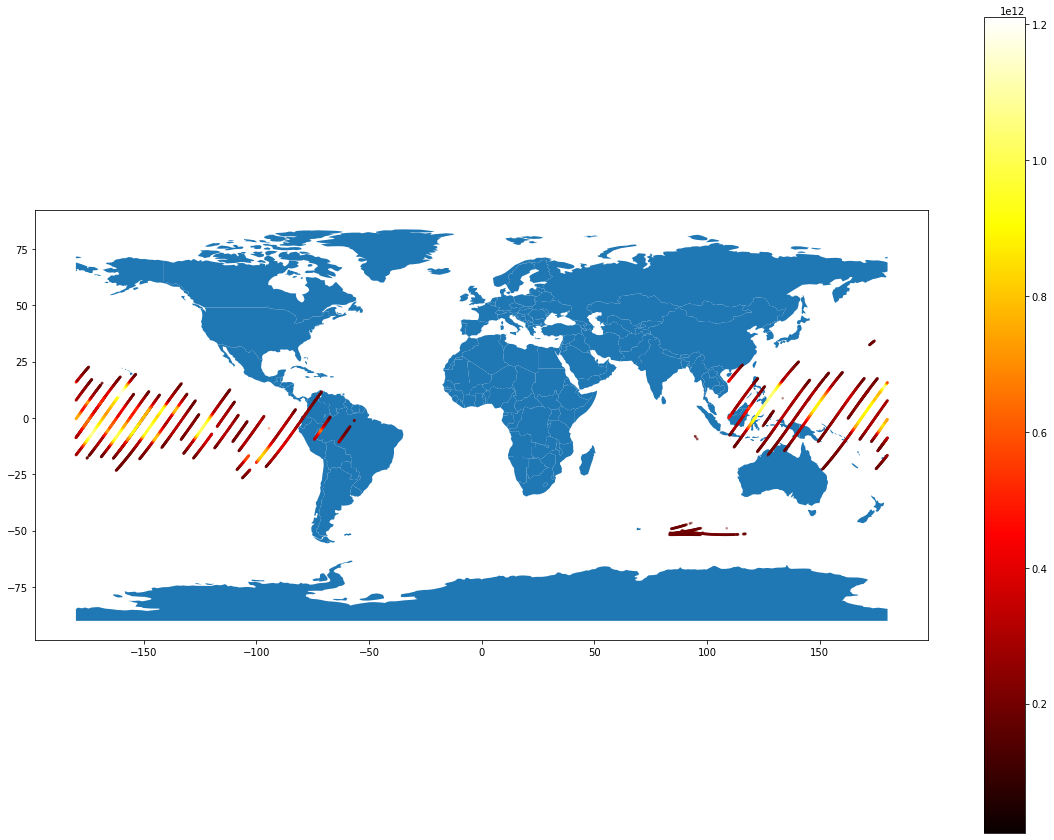

In [189]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(
    marker='o',
    ax=world.plot(figsize=(20, 15)), 
    markersize=3,
    alpha = 0.3,
    column='ION_DENSITY_m-3',
    vmin = 1e+10,
    vmax = e_density.max(),
    cmap='hot',
    legend=True,
);

In [190]:
two_d

EPOCH_yyyy-mm-ddThh:mm:ss.sssZ  LATITUDE_deg  LONGITUDE_deg  \
0            2020-09-09T00:00:00.856Z       -10.775        296.581   
1            2020-09-09T00:00:01.855Z       -10.725        296.619   
2            2020-09-09T00:00:02.856Z       -10.674        296.656   
3            2020-09-09T00:00:03.856Z       -10.624        296.693   
4            2020-09-09T00:00:04.855Z       -10.574        296.730   
...                               ...           ...            ...   
171336       2020-09-13T07:03:46.560Z        -7.779        359.950   
171337       2020-09-13T05:20:27.416Z        23.572        359.953   
171338       2020-09-12T04:28:13.379Z        38.817        359.960   
171339       2020-09-14T06:14:39.291Z         0.450        359.974   
171340       2020-09-12T07:52:48.603Z       -15.646        359.984   

        ALTITUDE_km  ION_DENSITY_m-3  ELECTRON_TEMPERATURE_K  \
0           422.125     3.050000e+11                  1466.0   
1           422.112     3.040000e+11                  1384.0   
2           422.098     3.150000e+11                  1389.0   
3           422.084     3.070000e+11                  -999.0   
4           422.071     3.170000e+11                  1391.0   
...             ...              ...                     ...   
171336      421.922     6.680000e+10                  2951.0   
171337      420.084     6.890000e+10                  1908.0   
171338      422.485     9.190000e+10                  1454.0   
171339      420.428     5.520000e+10                  2412.0   
171340      424.090     8.200000e+10                  2836.0   

        ISS_PITCH_ANGLE_deg  SUNLIGHT_%  TIME_CODE_CORRECTION_  
0                     358.0         0.0                      0  
1                     358.0         0.0                      0  
2                     358.0         0.0                      0  
3                     358.0         0.0                      0  
4                     358.0         0.0                      0  
...                     ...         ...                    ...  
171336                358.0       100.0                      0  
171337                358.0       100.0                      0  
171338                358.0       100.0                      0  
171339                358.0       100.0                      0  
171340                358.0       100.0                      0  

[171341 rows x 9 columns]

In [267]:
e_threshold = 80000000000

In [268]:
two_d_knn = two_d[["LATITUDE_deg","LONGITUDE_deg","ION_DENSITY_m-3"]]
two_d_knn = two_d_knn.query('`ION_DENSITY_m-3` > @e_threshold')
two_d_knn

LATITUDE_deg  LONGITUDE_deg  ION_DENSITY_m-3
0            -10.775        296.581     3.050000e+11
1            -10.725        296.619     3.040000e+11
2            -10.674        296.656     3.150000e+11
3            -10.624        296.693     3.070000e+11
4            -10.574        296.730     3.170000e+11
...              ...            ...              ...
171332       -15.596        359.944     8.320000e+10
171333       -34.028        359.944     9.210000e+10
171334       -48.642        359.945     1.080000e+11
171338        38.817        359.960     9.190000e+10
171340       -15.646        359.984     8.200000e+10

[103469 rows x 3 columns]

In [269]:
latitude_knn = two_d_knn.iloc[:,0].values   #float64
longitude_knn = two_d_knn.iloc[:,1].values
for j,lon_knn in enumerate(longitude_knn):
    if lon_knn > 180:
        longitude_knn[j] = lon_knn - 360
two_d_knn

LATITUDE_deg  LONGITUDE_deg  ION_DENSITY_m-3
0            -10.775        -63.419     3.050000e+11
1            -10.725        -63.381     3.040000e+11
2            -10.674        -63.344     3.150000e+11
3            -10.624        -63.307     3.070000e+11
4            -10.574        -63.270     3.170000e+11
...              ...            ...              ...
171332       -15.596         -0.056     8.320000e+10
171333       -34.028         -0.056     9.210000e+10
171334       -48.642         -0.055     1.080000e+11
171338        38.817         -0.040     9.190000e+10
171340       -15.646         -0.016     8.200000e+10

[103469 rows x 3 columns]

In [270]:
target = 'ION_DENSITY_m-3'

In [271]:
X = two_d_knn[["LATITUDE_deg","LONGITUDE_deg"]]
y = two_d_knn[[target]]

In [272]:
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    cross_validate
)
from sklearn.neighbors import KNeighborsRegressor

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=123)

In [274]:
knn =  KNeighborsRegressor(weights="distance")

knn_scores = pd.DataFrame(cross_validate(knn,X_train,y_train,return_train_score=True))
knn_scores

fit_time  score_time  test_score  train_score
0  0.018104    0.028018    0.944477          1.0
1  0.016608    0.026257    0.952809          1.0
2  0.016253    0.025329    0.951005          1.0
3  0.015499    0.023814    0.962737          1.0
4  0.016468    0.023240    0.952860          1.0

In [275]:
param_grid = {"n_neighbors": [1,5,10,50,100,]}

grid_search = GridSearchCV(
    knn, param_grid, cv=5, n_jobs=-1, return_train_score=True
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 50, 100]},
             return_train_score=True)

In [276]:
grid_search.best_score_

0.9564172335895897

In [277]:
grid_search.best_params_

{'n_neighbors': 10}

In [278]:
knn =  KNeighborsRegressor(weights="distance",n_neighbors=grid_search.best_params_['n_neighbors'])

In [279]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9588733376303054

In [280]:
test_lat = np.arange(-90, 91)
test_lon = np.arange(-180, 180)

In [281]:
from itertools import product

all_coords = product(test_lat, test_lon)

In [282]:
test_coords = pd.DataFrame(all_coords,columns = ["LATITUDE_deg","LONGITUDE_deg"])
test_coords

LATITUDE_deg  LONGITUDE_deg
0               -90           -180
1               -90           -179
2               -90           -178
3               -90           -177
4               -90           -176
...             ...            ...
65155            90            175
65156            90            176
65157            90            177
65158            90            178
65159            90            179

[65160 rows x 2 columns]

In [283]:
test_coords.loc[:,"ION_DENSITY_m-3"] = knn.predict(test_coords)
test_coords

LATITUDE_deg  LONGITUDE_deg  ION_DENSITY_m-3
0               -90           -180     8.768926e+10
1               -90           -179     8.811948e+10
2               -90           -178     8.901011e+10
3               -90           -177     9.008008e+10
4               -90           -176     8.932009e+10
...             ...            ...              ...
65155            90            175     8.212596e+10
65156            90            176     8.212555e+10
65157            90            177     8.212515e+10
65158            90            178     8.207527e+10
65159            90            179     8.215508e+10

[65160 rows x 3 columns]

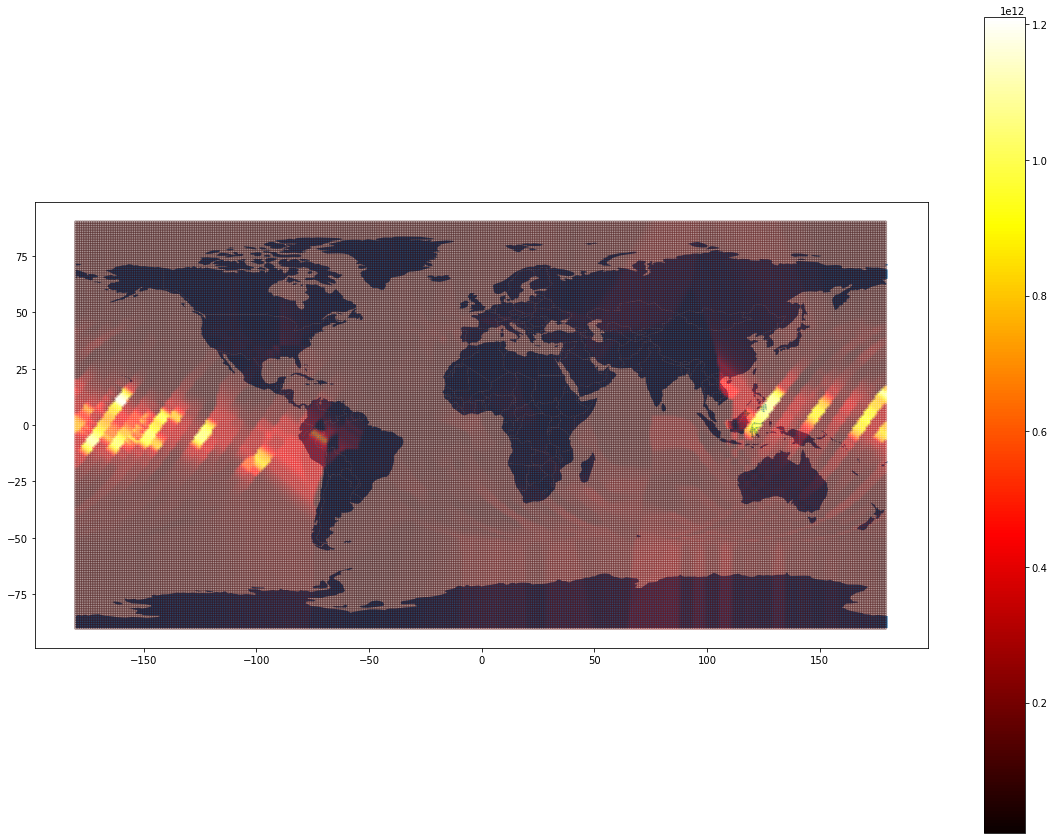

In [290]:
geometry = [Point(xy) for xy in zip(test_coords.iloc[:,1].values, test_coords.iloc[:,0].values)]
gdf = GeoDataFrame(test_coords, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(
    marker='o',
    ax=world.plot(figsize=(20, 15)), 
    markersize=8,
    alpha = 0.3,
    column='ION_DENSITY_m-3',
    vmin = e_threshold*0.1,
    vmax = e_density.max(),
    cmap='hot',
    legend=True,
);